Na dnešní lekci si do virtuálního prostředí nainstalujte následující balíčky:

    python -m pip -q install notebook numpy scipy matplotlib pillow


Mezitím co se to bude instalovat si stáhněte do adresáře `static` tyto soubory:

* [python.jpg](static/python.jpg)
* [sample.wav](static/sample.wav)
* [secret.png](static/secret.png)

A až bude nainstalováno, spusťte si nový Notebook. (Viz [lekce o Notebooku](../notebook).)

---

# NumPy

NumPy je základní knihovna pro vědce a analytiky, kteří pracují s Pythonem. Definuje typ pro *n*-rozměrné homogenní pole (nejčastěji čísel) a API pro práci s takovým polem.

Téměř všechny knihovny, kde se objevují větší matice či tabulky, jsou buď postavené na NumPy, nebo podporují `numpy.array`: od `pandas` pro datovou analýzu a `matplotlib` pro grafy, přes `scipy`, kde najdete základní algoritmy pro interpolaci, integraci aj., astrofyzikální `astropy`, `librosa` pro analýzu hudby, až po integraci v knihovnách jako `Pillow` nebo `Tensorflow`. 

Podobně jako „Djangonauti” kolem webového frameworku Django tvoří vědci a datoví analytici podskupinu pythonní komunity s vlastními konferencemi (PyData), organizacemi (NumFocus, Continuum Analytics) a knihovnami jako NumPy, Pandas, SciPy, Matplotlib či Astropy. Potřeby této komunity se samozřejmě odrážejí i v Pythonu samotném (např. `...` a `@`, které si ukážeme dále, byly do jazyka přidány pro ulehčení výpočtů) a naopak (na rozdíl od specializovaných jazyků jako R nebo Matlab se tu stále indexuje od nuly). Většina těchto knihoven ale má jednu zvláštnost, kterou ve zbytku pythonního světa tolik nevidíme: důraz na použití v interaktivním režimu.


## Nejednoznačnost a zkratky

Čísla můžeme buď prozkoumávat, hrát si s nimi, zjišťovat zajímavé souvislosti; anebo můžeme připravovat programy, které nějaké výpočty provedou automaticky.
Na obojí se používají podobné nástroje.
Automaticky pouštěné skripty musí být samozřejmě robustní. Nástroje ke zkoumání dat ale bývají přívětivé k vědcům, často na úkor robustnosti nebo „dobrých programátorských mravů”. Například některé funkce tak trochu „hádají”, co uživatel chtěl, a v tutoriálech se setkáte se zkratkami jako `import numpy as np` či dokonce `from numpy import *`.

Toto je kurz programovací, kde nám záleží více na znovupoužitelném kódu než na jednom konkrétním výsledku. Budeme proto preferovat explicitní a jednoznačné operace. Ty jsou v použitých knihovnách vždy vedle zkratek k dispozici a popsány v dokumentaci.


Jak s polem pracovat? Nejprve si ho vytvoříme, nejlépe ze seznamu čísel:

In [1]:
import numpy
array = numpy.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Každé pole má dvě základní, neměnné vlastnosti: *tvar* (`shape`), neboli velikost, a *datový typ* (`dtype`).

In [2]:
array.shape

(3, 3)

In [3]:
array.dtype

dtype('int64')

Tvar je *n*-tice, kde *n* je počet dimenzí pole; `shape=(3, 3) dtype='int64'` znamená pole 3×3 celých čísel.
Dimenzí může být libovolně mnoho, např. trojrozměrnou matici můžeme vytvořit z trojnásobně vnořených seznamů a NumPy ji „rozumně” vypíše:

In [4]:
cube = numpy.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(cube.shape)
cube

(2, 2, 2)


array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

## Základní operace

Základní vlastnost NumPy polí je to, že aritmetické operace se skalárními hodnotami (např. čísly) fungují po prvcích.

In [5]:
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [6]:
array - 1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [7]:
array / 2

array([[ 0.5,  1. ,  1.5],
       [ 2. ,  2.5,  3. ],
       [ 3.5,  4. ,  4.5]])

In [8]:
-(array % 4)

array([[-1, -2, -3],
       [ 0, -1, -2],
       [-3,  0, -1]])

Kromě aritmetických operací takto funguje i porovnávání. Následujícím výrazem dostanete *pravdivostní tabulku*, která má `True` na místech, kde pro příslušný prvek platí podmínka:

In [9]:
array > 5

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]], dtype=bool)

Protože Python neumožňuje předefinovat chování operátorů `and` a `or`, logické spojení operací se tradičně dělá přes bitové operátory `&` (a) a `|` (nebo). Ty mají ale neintuitivní prioritu, proto se jednotlivé výrazy hodí uzavřít do závorek:

In [10]:
(array > 3) & (array < 7)

array([[False, False, False],
       [ True,  True,  True],
       [False, False, False]], dtype=bool)

Operace s jinými poli pracují po prvcích. Obě pole musí být stejně velké.

In [11]:
array + array

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [12]:
array * numpy.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

array([[0, 2, 0],
       [4, 0, 6],
       [0, 8, 0]])

Sekvence (jako seznamy) jsou před operací převedeny na pole.

In [13]:
array * [[0, 1, 0], [1, 0, 1], [0, 1, 0]]

array([[0, 2, 0],
       [4, 0, 6],
       [0, 8, 0]])

## Indexování

NumPy pole jde různými způsoby indexovat. Základní způsoby známe už ze samotného Pythonu – pole se chová jako sekvence menších polí:

In [14]:
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
array[0]

array([1, 2, 3])

In [16]:
array[0:-1]

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
array[0][1]

2

Na rozdíl od Pythonu se ale dá vícerozměrné pole indexovat přímo *n*-ticí. Toto je dokonce preferovaný způsob – přehlednější a mnohem rychlejší:

In [18]:
array[0, 1]

2

In [19]:
array[0:-1, 1:]

array([[2, 3],
       [5, 6]])

Chceme-li vybrat určitý sloupec, řekneme si „kompletním intervalem“ (`:`) o všechny řádky:

In [20]:
array[:, 2]

array([3, 6, 9])

Další způsob specifický pro NumPy je indexování pravdivostní tabulkou.

Když potřebujete z matice vybrat prvky, pro které platí nějaká podmínka, napřed si vytvořte pole hodnot `True`/`False`:

In [21]:
array > 4

array([[False, False, False],
       [False,  True,  True],
       [ True,  True,  True]], dtype=bool)

To pak použijte jako index:

In [22]:
array[array > 4]

array([5, 6, 7, 8, 9])

Výsledek je jednorozměrný – informace o původních pozicích prvků se ztratí.

Pro úplnost uvedu ještě dva způsoby indexování. První je seznamem indexů, kterým můžete vybírat, přehazovat nebo i duplikovat konkrétní řádky

In [23]:
array[[0, 2, 1, 1]]  # Řádky 0, 2, 1 a 1

array([[1, 2, 3],
       [7, 8, 9],
       [4, 5, 6],
       [4, 5, 6]])

In [24]:
array[:, [2, 2, 0, 0]]  # Podobně pro sloupce

array([[3, 3, 1, 1],
       [6, 6, 4, 4],
       [9, 9, 7, 7]])

Druhý je indexování pomocí *n*-tice „řádkových souřadnic“ a *n*-tice odpovídajících „sloupcových souřadnic“:

In [25]:
array[(0, 1, 2), (1, 2, 0)]  # Vybere prvky (0, 1), (1, 2), (2, 0)

array([2, 6, 7])

Trochu specifické je indexování vícerozměrných polí. U nich se často využije „kompletní interval“ (`:`):

In [26]:
cube

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [27]:
cube[0, :, :]  # První „vrstva“ - to samé jako cube[0]

array([[1, 2],
       [3, 4]])

In [28]:
cube[:, 0, :]  # První řádky - to samé jako cube[:, 0]

array([[1, 2],
       [5, 6]])

In [29]:
cube[:, :, 0]  # První sloupce

array([[1, 3],
       [5, 7]])

Má-li pole hodně rozměrů, je psaní spousty `:,` zdlouhavé a nepřehledné. Existuje proto speciální hodnota `...` (`Ellipsis`), která doplní tolik „kompletních intervalů“ (`:`), aby souhlasil počet dimenzí:

In [30]:
cube[..., 0]  # První sloupce – ekvivalent [:, :, 3]

array([[1, 3],
       [5, 7]])

## Broadcasting a změny

Už jsme si ukázali, že aritmetické operace se skalárními hodnotami se provede pro všechny prvky, zatímco operace mezi dvěma stejně velkými poli se provede po prvcích:

In [31]:
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [32]:
array * 3

array([[ 3,  6,  9],
       [12, 15, 18],
       [21, 24, 27]])

In [33]:
array * [[0, 1, 0], [1, 0, 1], [0, 1, 0]]

array([[0, 2, 0],
       [4, 0, 6],
       [0, 8, 0]])

Jak je to ale s různě velkými poli?

Nemá-li sekvence, se kterou pracujeme, dost dimenzí, poslední dimenze se „rozšíří“, jako bychom pracovali v každém sloupci se skalární hodnotou. Tomuto „rozšiřování” se obecně říká *broadcasting*.

In [34]:
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [35]:
array * [0, 1, 10]   # vynásobí 1. sloupec nulou, 2. jedničkou, 3. deseti

array([[ 0,  2, 30],
       [ 0,  5, 60],
       [ 0,  8, 90]])

Podobné rozšiřování nastane, má-li některá dimenze velikost 1:

In [36]:
array * [[0], [1], [10]]  # vynásobí 1. *řádek* nulou, atd.

array([[ 0,  0,  0],
       [ 4,  5,  6],
       [70, 80, 90]])

Jednotlivé hodnoty v poli lze měnit:

In [37]:
array[0, 0] = 123
array

array([[123,   2,   3],
       [  4,   5,   6],
       [  7,   8,   9]])

...a i na měnění se vztahuje *broadcasting*:

In [38]:
array[0] = 123
array

array([[123, 123, 123],
       [  4,   5,   6],
       [  7,   8,   9]])

In [39]:
array[:] = 123
array

array([[123, 123, 123],
       [123, 123, 123],
       [123, 123, 123]])

Obecně platí, že lze-li něčím vybírat prvky, lze tím i pole měnit:

In [40]:
array[(1, 2, 0), (0, 2, 1)] = 0
array

array([[123,   0, 123],
       [  0, 123, 123],
       [123, 123,   0]])

Další způsob, jak pole měnit, je rozšířeným přiřazením.

In [41]:
array *= 2
array

array([[246,   0, 246],
       [  0, 246, 246],
       [246, 246,   0]])

Tato operace není totéž co `array = array * 2`, ačkoli má stejný výsledek.

`array *= 2` změní existující pole, zatímco `array = array * 2` vytvoří *nové* pole, které pak přiřadí do původní proměnné.


Pozor na to, že není možné měnit typ pole:

In [42]:
try:
    array /= 2
except Exception as e:
    print("Chyba!!", type(e), e)

Chyba!! <class 'TypeError'> ufunc 'true_divide' output (typecode 'd') could not be coerced to provided output parameter (typecode 'l') according to the casting rule ''same_kind''


## Tvoření matic, část 2

Časté druhy matic se dají vytvořit pomocí pomocných funkcí. Výsledky se dají použít přímo nebo naplnit vypočítanými daty:

In [43]:
numpy.zeros((4, 4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [44]:
numpy.ones((4, 4))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [45]:
numpy.full((4, 4), 12.34)

array([[ 12.34,  12.34,  12.34,  12.34],
       [ 12.34,  12.34,  12.34,  12.34],
       [ 12.34,  12.34,  12.34,  12.34],
       [ 12.34,  12.34,  12.34,  12.34]])

In [46]:
numpy.eye(4)  # Jednotková matice (je čtvercová – n×n)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [47]:
numpy.diag([1, 2, 3, 4])  # Diagonální matice

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

U těchto funkcí lze obecně použít argument `dtype`, kterým specifikujeme datový typ:

In [48]:
int_zeros = numpy.zeros((4, 4), dtype='int8')
print(int_zeros.dtype)
int_zeros

int8


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

Další funkce tvoří jednorozměrné matice. Základní je `arange`, která bere stejné argumenty jako `range` v Pythonu:

In [49]:
numpy.arange(50)  # Celočíselné – argumenty jako range() v Pythonu

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

Navíc umí pracovat s reálnými čísly (`float`). Pozor ale na to, že reálná čísla jsou *nepřesná*! `arange` k začátku sekvence postupně přičítá „krok”, takže chyba narůstá celkem rychle:

In [50]:
numpy.arange(0.0, 50.0, 0.3)[-1]

49.799999999999997

V krajních případech takto dokonce můžeme dostat pole jiné *velikosti*, než jsme zamýšleli. Proto `arange` používejte jen pro celá čísla; pro reálná je tu `linspace`, která bere začátek a konec intervalu, plus počet prvků:

In [51]:
numpy.linspace(0, 50, num=11)  # vždy 11 prvků

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.])

## Reshape

Ačkoli indexování polí v NumPy je dost mocné, v paměti jsou jednotlivé hodnoty reprezentovány jako (metadata a) jednorozměrné pole, známé z jazyka C (ačkoli samotné rozmístění prvků může být jiné než po řádcích, jak jsme zvyklí u C).

Je jednoduché změnit tvar pole, nezmění-li se tím celkový počet prvků:

In [52]:
array = numpy.arange(12)
array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [53]:
reshaped = array.reshape((3, 4))
reshaped

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Pozor na to, že `reshape` sice vrací nový objekt, ale může (ale nemusí!) to být jen nový *pohled* na existující data. Změny v pohledu se projeví i v původním poli:

In [54]:
reshaped[2, 2] = -99
reshaped

array([[  0,   1,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9, -99,  11]])

In [55]:
array

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, -99,  11])

Podobně tvoří pohledy i jednoduché indexování:

In [56]:
a_slice = array[2:4]
a_slice[:] = -99, -99

array

array([  0,   1, -99, -99,   4,   5,   6,   7,   8,   9, -99,  11])

Potřebujete-li kopii dat, použijte metodu `copy`:

In [57]:
array.reshape((3, 4)).copy()

array([[  0,   1, -99, -99],
       [  4,   5,   6,   7],
       [  8,   9, -99,  11]])

Podobně jako `reshape` funguje transpozice, což je tak častá operace, že má jednopísmennou zkratku – atribut `T`. (Tohle hodně napomáhá tomu, že zápis maticových výpočtů v NumPy se podobá odpovídajícím matematickým vzorcům.)

In [58]:
reshaped.T

array([[  0,   4,   8],
       [  1,   5,   9],
       [-99,   6, -99],
       [-99,   7,  11]])

Až budete NumPy zkoušet, doporučuji si u nových funkcí najít, zda tvoří nová pole, vracejí pohled nebo modifikují původní pole. U některých funkcí najdete pojmenovaný argument `inplace` (modifikuje původní pole), případně `out`, („naplní“ jiné, existující pole).

## Datové typy

Jak už bylo řečeno, matice v NumPy mají určené datové typy. Ty jdou nastavit ve většině funkcí, které matice tvoří, argumentem `dtype`:

In [59]:
numpy.zeros(4, dtype=int)

array([0, 0, 0, 0])

In [60]:
numpy.zeros(4, dtype=float)

array([ 0.,  0.,  0.,  0.])

In [61]:
numpy.zeros(4, dtype=bool)

array([False, False, False, False], dtype=bool)

Nejobecnější typ je `object` (jehož použitím ale přicházíme o většinu výhod NumPy).

In [62]:
numpy.array([0, 1.3, "foobar"], dtype=object)

array([0, 1.3, 'foobar'], dtype=object)

Kromě pythonních typů bere `dtype` i řetězcové specifikace typu:

In [63]:
numpy.array([1, 8, 500], dtype='int8')  # 8-bitové číslo

array([  1,   8, -12], dtype=int8)

Znáte-li modul [`array`](https://docs.python.org/3/library/array.html) ze standardní knihovny, můžete jeho specifikaci použít i tady:

In [64]:
numpy.zeros(4, dtype='<I')

array([0, 0, 0, 0], dtype=uint32)

Navíc `dtype` umí řetězcové a *bytestring* typy. Tyto mají danou maximální velikost a nesmí obsahovat `\0` (resp. znakem `'\0'` jsou ukončeny):

In [65]:
numpy.full(4, 'abcdef', dtype=('U', 10))  # Unicode

array(['abcdef', 'abcdef', 'abcdef', 'abcdef'], 
      dtype='<U10')

In [66]:
numpy.full(4, 'abcdef', dtype=('a', 3))  # "ASCII"

array([b'abc', b'abc', b'abc', b'abc'], 
      dtype='|S3')

Typy v NumPy můžou být poměrně složité; např. existují i složené datové typy (`records`). Ty nebudeme používat, ale je dobré o nich aspoň tušit:

In [67]:
record_type = numpy.dtype([('a', int), ('b', float), ('c', ('U', 3))])
numpy.array([(1, 2, 'abc')] * 4, record_type)

array([(1,  2., 'abc'), (1,  2., 'abc'), (1,  2., 'abc'), (1,  2., 'abc')], 
      dtype=[('a', '<i8'), ('b', '<f8'), ('c', '<U3')])

## Maticové násobení

Kromě základních aritmetických operací se u vícerozměrných polí často setkáme s maticovým násobením. Předpokládám, že jako bakaláři jste se s ním už setkali a tušíte co dělá – jestli ne, tuto sekci ignorujte.

V Pythonu 3.5 byl na [výzvu vědecké komunity](http://legacy.python.org/dev/peps/pep-0465/) do jazyka přidán operátor `@` (mATrix multiplication), který je vyhrazen pro maticové násobení. V samotném Pythonu ani ve standardní knihovně není typ, který ho podporuje, ale matice v NumPy tuto operaci samozřejmě umí.

In [68]:
array1 = numpy.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array2 = numpy.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
array1 @ array2

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

Ve starších verzích Pythonu je potřeba používat metodu nebo funkci `dot`.

Důvod přidání operátoru `@` byl prostý – zjednodušení zápisu maticových operací. Jako příklad uvedený v návrhu je uveden tento vzorec pro testování hypotéz v lineárním regresním modelu:

$ S=(H\beta-r)^T(HVH^T)^{-1} (H\beta-r) $

V NumPy se dá přepsat jako:

```python
from numpy import dot
from numpy.linalg import inv, solve
```

Pomocí funkce `dot`:

```python
S = dot((dot(H, beta) - r).T,
       dot(inv(dot(dot(H, V), H.T)), dot(H, beta) - r))
```

Pomocí metoody `dot`:

```python
S = (H.dot(beta) - r).T.dot(inv(H.dot(V).dot(H.T))).dot(H.dot(beta) - r)
```


Pomocí operátoru `@`:

```python
S = (H @ beta - r).T @ inv(H @ V @ H.T) @ (H @ beta - r)
```

Poslední varianta nápadně připomíná původní vzorec; u prvních dvou se člověk snadno ztratí ve změti závorek.

## Booleovské hodnoty polí

Použijeme-li pole v příkazu *if*, NumPy nám vynadá. Standardní pythonní seznam je „pravdivý“ pokud obsahuje nějaké prvky, ale u pole, které má fixní velikost, je tahle informace téměř vždy zbytečná.

In [69]:
try:
    if numpy.eye(3):
        pass
except ValueError as e:
    print("Chyba!", type(e), e)

Chyba! <class 'ValueError'> The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Musíme říct přesně, co chceme.

In [70]:
if numpy.eye(3).any():
    print('Alespoň jeden prvek je nenulový')
if numpy.eye(3).all():
    print('Všechny prvky jsou nenulové')
if numpy.eye(3).size:
    print('Pole obsahuje nějaké prvky')

Alespoň jeden prvek je nenulový
Pole obsahuje nějaké prvky


Z historických důvodů existují dvě výjimky: pole s právě jedním prvkem má pravdivostní hodnotu podle daného prvku a prázdné pole je „nepravdivé“:

In [71]:
if numpy.ones((1, 1, 1, 1)):
    print('Ano')
if numpy.zeros((1, 1, 1, 1)):
    print('Ne')

Ano


In [72]:
if numpy.ones((0, 0)):
    print('Ano')

## Další operace

Modul `numpy` obsahuje spoustu základních funkcí, které pracují s maticemi; mimo jiné většinu funkcií z pythonního modulu `math`. Oproti `math` zvládají funkce z NumPy *broadcasting*.

In [73]:
array = numpy.linspace(0, numpy.pi, num=1000)
array[:10]

array([ 0.        ,  0.00314474,  0.00628947,  0.00943421,  0.01257895,
        0.01572369,  0.01886842,  0.02201316,  0.0251579 ,  0.02830264])

In [74]:
sine = numpy.sin(array)
sine[:10]

array([ 0.        ,  0.00314473,  0.00628943,  0.00943407,  0.01257862,
        0.01572304,  0.0188673 ,  0.02201138,  0.02515525,  0.02829886])

Další operace doporučuji hledat buď v Notebooku přes <kbd>tab</kbd>, v dokumentaci, nebo obecně na Internetu (kde najdete i případné knihovny, které implementují operace, které v NumPy nejsou).

# Příklady použití

Dost teorie. Tahle *n*-rozměrná pole se používají na spoustu zajímavých věcí. Podívejme se na některé příklady.

## Matematika a grafy

Jak se používají matice, jistě znáte z matematiky a cílem tohoto kurzu není vás to naučit. Ukážu ale pár ochutnávek.

Použijeme knihovnu [Matplotlib](https://matplotlib.org/), která vykresluje grafy. Jak ji použít dohledáte v [dokumentaci](https://matplotlib.org/contents.html) nebo – často efektivněji – v [galerii příkladů](https://matplotlib.org/gallery/index.html).

Matplotlib nemá automatickou integraci s Jupyter Notebookem, proto ji je potřeba po importu zapnout:

In [75]:
from matplotlib import pyplot

# Zapnutí integrace s notebookem – `%` je "magický" příkaz IPythonu, podobně jako `!` pro shell
%matplotlib inline

A teď můžeme nakreslit třeba graf funkce:

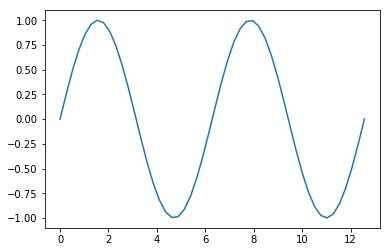

In [76]:
x = numpy.linspace(0, numpy.pi * 4)   # definiční obor
y = numpy.sin(x)                      # odpovídající hodnoty funkce

pyplot.plot(x, y)

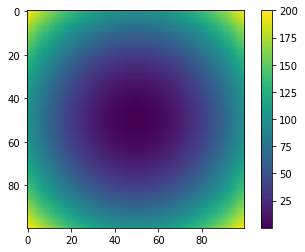

In [77]:
s = numpy.linspace(-10, 10, num=100)

# meshgrid vrátí dvě 100×100 matice:
# - jednu, kde v každém řádku jsou čísla od -10 do 10,
# - druhou, kde v každém sloupci jsou čísla od -10 do 10.
x, y = numpy.meshgrid(s, s)

# vyhodnotíme (x**2 + y**2) pro každý prvek
z = x ** 2 + y ** 2

# výsledek vykreslíme jako obrázek
pyplot.imshow(z)

# přidáme legendu
pyplot.colorbar()

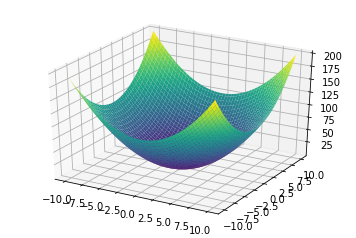

In [78]:
# Ta samá data můžeme vykreslit i ve 3D
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
axes = fig.gca(projection='3d')

surf = axes.plot_surface(x, y, z, cmap='viridis')

## Obrázky

Typický barevný obrázek není nic než matice $m \times n \times 3$ čísel: $m \times n$ pixelů na šířku a výšku a 3 kanály pro červenou, zelenou a modrou barvu.

Knihovna `pillow` (nástupce knihovny PIL, který se stále importuje jako PIL) obsahuje nástroje na práci s obrázky, např. „nakresli čáru“ nebo „převeď na černobílý obrázek“ nebo „načti PNG“. Není postavena přímo na NumPy, ale umí obrázky převádět z a na NumPy pole, pokud máme NumPy nainstalované.

V knihovně `scipy.ndimage` existuje spousta nástrojů na analýzu obrazových dat jako 2D signálů, např. konvoluce nebo Sobelův filtr. Jako celé SciPy je postavená přímo na NumPy.

Nás bude na začátku zajímat funkce `scipy.ndimage.imread`, která pomocí Pillow/PIL načte obrázek jako 3D matici 8-bitových čísel. Já načtu obrázek hada, vy najděte na internetu jakýkoli barevný obrázek a načtěte si ten.

*Použitý obrázek je stažený [z Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Ball_python_lucy.JPG) a je pod licencí [CC-BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en). Autor je uživatel [Mokele](https://en.wikipedia.org/wiki/User:HCA) na [anglické Wikipedii](https://en.wikipedia.org/wiki/).*

In [79]:
import scipy.ndimage
img = scipy.ndimage.imread('static/python.jpg', mode='RGB')
img

array([[[172, 173, 165],
        [173, 174, 166],
        [173, 174, 168],
        ..., 
        [172, 171, 167],
        [173, 172, 168],
        [173, 172, 168]],

       [[175, 176, 168],
        [174, 175, 167],
        [172, 173, 167],
        ..., 
        [172, 171, 167],
        [173, 172, 168],
        [174, 173, 169]],

       [[176, 177, 169],
        [174, 175, 167],
        [171, 172, 166],
        ..., 
        [173, 172, 168],
        [173, 172, 168],
        [172, 171, 167]],

       ..., 
       [[209, 211, 206],
        [210, 212, 207],
        [211, 213, 208],
        ..., 
        [202, 203, 197],
        [200, 201, 195],
        [200, 201, 195]],

       [[208, 210, 205],
        [209, 211, 206],
        [209, 211, 206],
        ..., 
        [202, 203, 197],
        [202, 203, 197],
        [203, 204, 198]],

       [[207, 209, 204],
        [209, 211, 206],
        [210, 212, 207],
        ..., 
        [201, 202, 196],
        [201, 202, 196],
        [201, 202,

Pomocí nám už známé knihovny `matplotlib` takovou matici můžeme zobrazit:

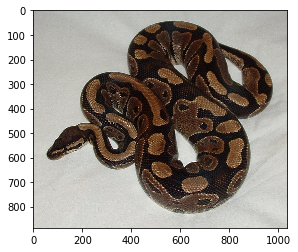

In [80]:
pyplot.imshow(img)

Podívejme se teď na strukturu matice:

In [81]:
img.shape

(887, 1037, 3)

První rozměr jsou řádky (y); můj obrázek je 887 pixelů vysoký. Druhý jsou sloupce (x); tento obrázek má na šířku 1037 px.
Třetí rozměr jsou barevné kanály.

Pomocí indexování se můžeme na jednotlivé barevné kanály dostat: je to poslední index, takže řádky a sloupce nahradíme buď dvěma kompletními intervaly (`:, :`) nebo vynechávkou (`...`). Červený kanál tedy bude `[..., 1]`, modrý `[..., -1]`.

Zobrazení chceme černobílé; na to má matplotlib pojmenovaný argument `cmap`. Výchozí způsob obarvování je vhodný spíše pro grafy funkcí.

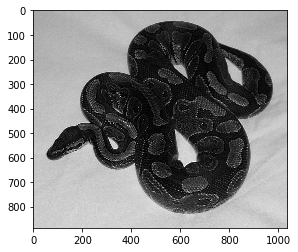

In [82]:
blue_channel = img[..., -1]
pyplot.imshow(blue_channel, cmap='gray')

Zajímavé využití obrázku jako matice je steganografie: ukrytí informace v obrazových datech.

Načteme jiný obrázek stejné velikosti, tentokrát černobílý (s módem `L`). Informace v něm schováme do posledního bitu modrého kanálu.

In [83]:
secret = scipy.ndimage.imread('static/secret.png', mode='L')

img[..., -1] = (img[..., -1] & 0b11111110) + (secret.astype(bool))

Obrázek vypadá na první pohled stejně...

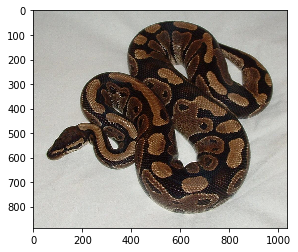

In [84]:
pyplot.imshow(img)

... ale v posledím modrém bitu se skrývá tajná informace.

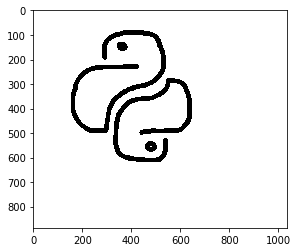

In [85]:
pyplot.imshow(img[..., -1] & 1, cmap='gray')

Výsledek je dobré uložit v bezztrátovém formátu (PNG), aby se informace neztratila:

In [86]:
scipy.misc.imsave('python.png', img)

## Zvuk

Jako pole lze reprezentovat i zvukový záznam. Mám záznam, na kterém zkouším zpívat; pomocí funkce `scipy.io.wavfile` ho můžu načíst jako NumPy pole:

In [87]:
import scipy.io.wavfile
sample_rate, sound = scipy.io.wavfile.read('static/sample.wav')
print(sample_rate)
sound

48000


array([[ -58,  -88],
       [ -65,  -49],
       [  56,  -18],
       ..., 
       [   1,  231],
       [ -85,  234],
       [-118,  212]], dtype=int16)

Zvuk je stereo, má dvě stopy; jednu z nich si vykreslím:

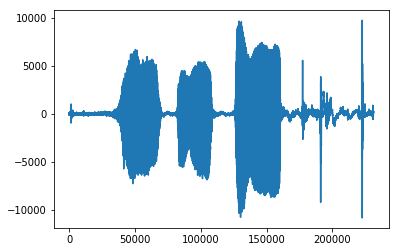

In [88]:
channel = sound[..., 1]
pyplot.plot(channel)

Případně můžu využít možností Jupyter Notebooku a HTML a zvuk si přehrát:

In [89]:
from IPython.display import Audio
Audio(data=channel, rate=sample_rate)
print('(Zkuste si to sami; tento print vymažte)')

(Zkuste si to sami; tento print vymažte)


Podívám se na detail první „noty”, kde je patrná vlna s nějakou frekvencí:

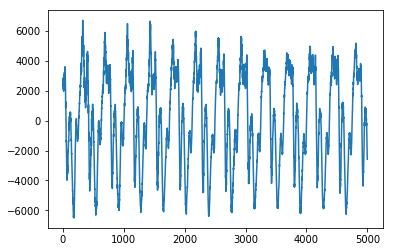

In [90]:
segment = channel[50000:55000]
pyplot.plot(segment)

In [91]:
from IPython.display import Audio
Audio(data=segment, rate=sample_rate)

Jaká to je frekvence? Znáte-li analýzu signálů, tušíte, že na podobné otázky odpovídá Fourierova transformace.
NumPy obsahuje diskrétní Fourierovu transformaci v modulu `numpy.fft` spolu s funkcí, která spočítá odpovídající frekvence v Hz:

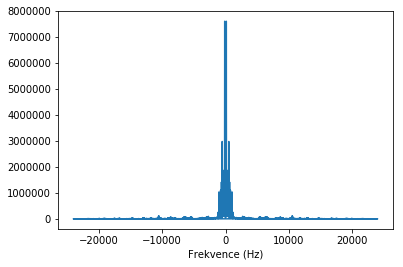

In [92]:
spectrum = numpy.fft.fft(segment)
freqs = numpy.fft.fftfreq(len(spectrum), 1/sample_rate)
pyplot.xlabel('Frekvence (Hz)')
pyplot.plot(freqs, numpy.abs(spectrum))

V tomto grafu hledám maximum. Můžu se zaměřit na prvních pár hodnot spektra:

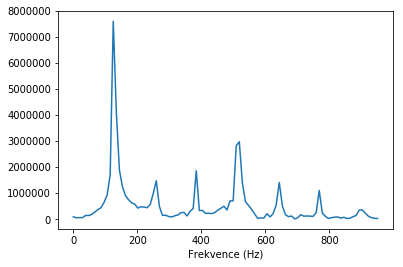

In [93]:
pyplot.xlabel('Frekvence (Hz)')
pyplot.plot(freqs[:100], numpy.abs(spectrum[:100]))

Maximum je někde kolem 120 Hz; abych to zjistil přesně, použiji funkci `argmax`:

In [94]:
amax = numpy.argmax(abs(spectrum))
amax

13

... a najdu odpovídající frekvenci:

In [95]:
freqs[amax]

124.80000000000001

Což je podle [seznamu not](https://en.wikipedia.org/wiki/Piano_key_frequencies) skoro H$_2$ (123,5 Hz).